In [1]:
# Importing necessary libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

plt.style.use('fivethirtyeight')

In [8]:
%%time

# Save the flattened data set
df_train = pd.read_csv('./Data/train-flattened.csv', dtype={'fullVisitorId': 'str'})

print(df_train.head(3))

  channelGrouping        date        fullVisitorId  \
0  Organic Search  2016-09-02  1131660440785968503   
1  Organic Search  2016-09-02   377306020877927890   
2  Organic Search  2016-09-02  3895546263509774583   

                        sessionId     visitId  visitNumber  visitStartTime  \
0  1131660440785968503_1472830385  1472830385            1      1472830385   
1   377306020877927890_1472880147  1472880147            1      1472880147   
2  3895546263509774583_1472865386  1472865386            1      1472865386   

  device.browser device.deviceCategory  device.isMobile  ...    \
0         Chrome               desktop            False  ...     
1        Firefox               desktop            False  ...     
2         Chrome               desktop            False  ...     

  trafficSource.isTrueDirect trafficSource.keyword trafficSource.medium  \
0                      False        (not provided)              organic   
1                      False        (not provided)     

/Users/amin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


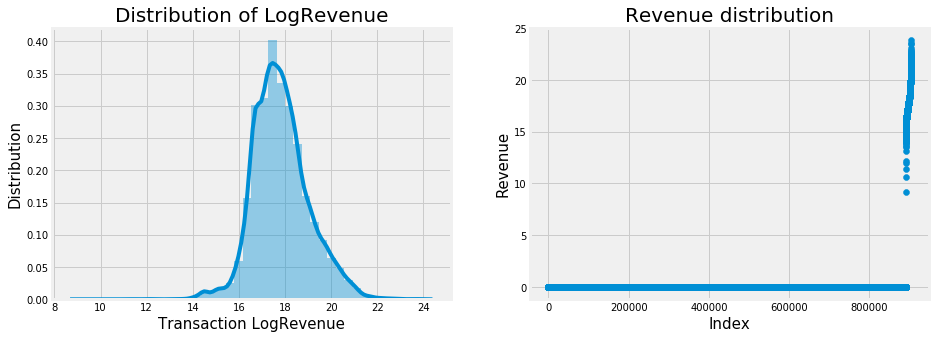

In [9]:
# Plotting the distributions of transactionRevenue

# Setting the figure size of our plots
plt.figure(figsize=(14,5))

# Create a subplot grid of 2 x 1
plt.subplot(1,2,1)
# Plotting the histogram of transactionRevenue after normalizing nonzero values by np.log on and 
# setting the number of bins and adding KDE on our histogram
sns.distplot(df_train[df_train['totals.transactionRevenue']>0]["totals.transactionRevenue"], bins=40, kde=True)
plt.xlabel('Transaction LogRevenue', fontsize=15) # Setting xlabel and font size
plt.ylabel('Distribution', fontsize=15) # Setting ylabel and font size
plt.title("Distribution of LogRevenue", fontsize=20) # Setting title and font size

# Setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # Setting xlabel and font size
plt.ylabel('Revenue', fontsize=15) # Setting ylabel and font size
plt.title("Revenue distribution", fontsize=20) # Setting title and font size

plt.show()



In [20]:
null_count = len(df_train[df_train['totals.transactionRevenue']>0])

null_per = len(df_train[df_train['totals.transactionRevenue']>0])/len(df_train)

print(f'{null_count}, {null_per:.2%}')

11515, 1.27%


In [16]:
df_train['totals.transactionRevenue'].dtype

dtype('float64')